In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import sys
import os

# Add parent directory to path
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

from src.config import DATA_PATHS, PLOT_STYLE

# Set plot style
plt.style.use(PLOT_STYLE)
sns.set_palette("viridis")

# Load Data
try:
    df_vader = pd.read_csv(DATA_PATHS['sentiment_results'])
    df_bert = pd.read_csv(DATA_PATHS['sentiment_results_bert'])
    df_themes = pd.read_csv(DATA_PATHS['theme_results'])
    df_themes_lda = pd.read_csv(DATA_PATHS['theme_results_lda'])
    print("✅ All datasets loaded successfully.")
except FileNotFoundError as e:
    print(f"❌ Error loading data: {e}")

✅ All datasets loaded successfully.


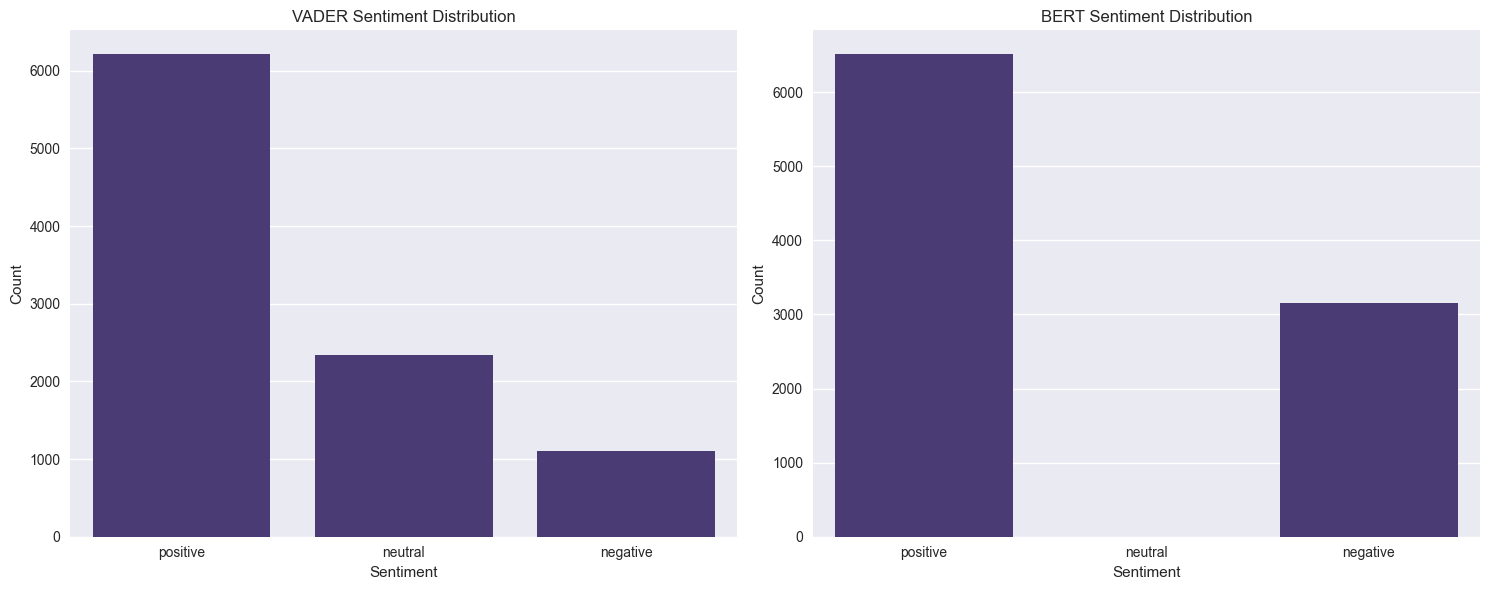

Agreement rate between VADER and BERT: 67.42%


In [33]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# VADER Distribution
sns.countplot(x='sentiment_label', data=df_vader, ax=axes[0], order=['positive', 'neutral', 'negative'])
axes[0].set_title('VADER Sentiment Distribution')
axes[0].set_xlabel('Sentiment')
axes[0].set_ylabel('Count')

# BERT Distribution
sns.countplot(x='sentiment_label', data=df_bert, ax=axes[1], order=['positive', 'neutral', 'negative'])
axes[1].set_title('BERT Sentiment Distribution')
axes[1].set_xlabel('Sentiment')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

# Print agreement rate
# Assuming dataframes are aligned by index
agreement = (df_vader['sentiment_label'] == df_bert['sentiment_label']).mean()
print(f"Agreement rate between VADER and BERT: {agreement:.2%}")

--- General Drivers & Pain Points (All Banks) ---


C:\Users\yeget\AppData\Local\Temp\ipykernel_12864\3312049302.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='identified_theme', data=positive_reviews, ax=axes[0], order=positive_reviews['identified_theme'].value_counts().index, palette='Greens_r')
C:\Users\yeget\AppData\Local\Temp\ipykernel_12864\3312049302.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='identified_theme', data=negative_reviews, ax=axes[1], order=negative_reviews['identified_theme'].value_counts().index, palette='Reds_r')


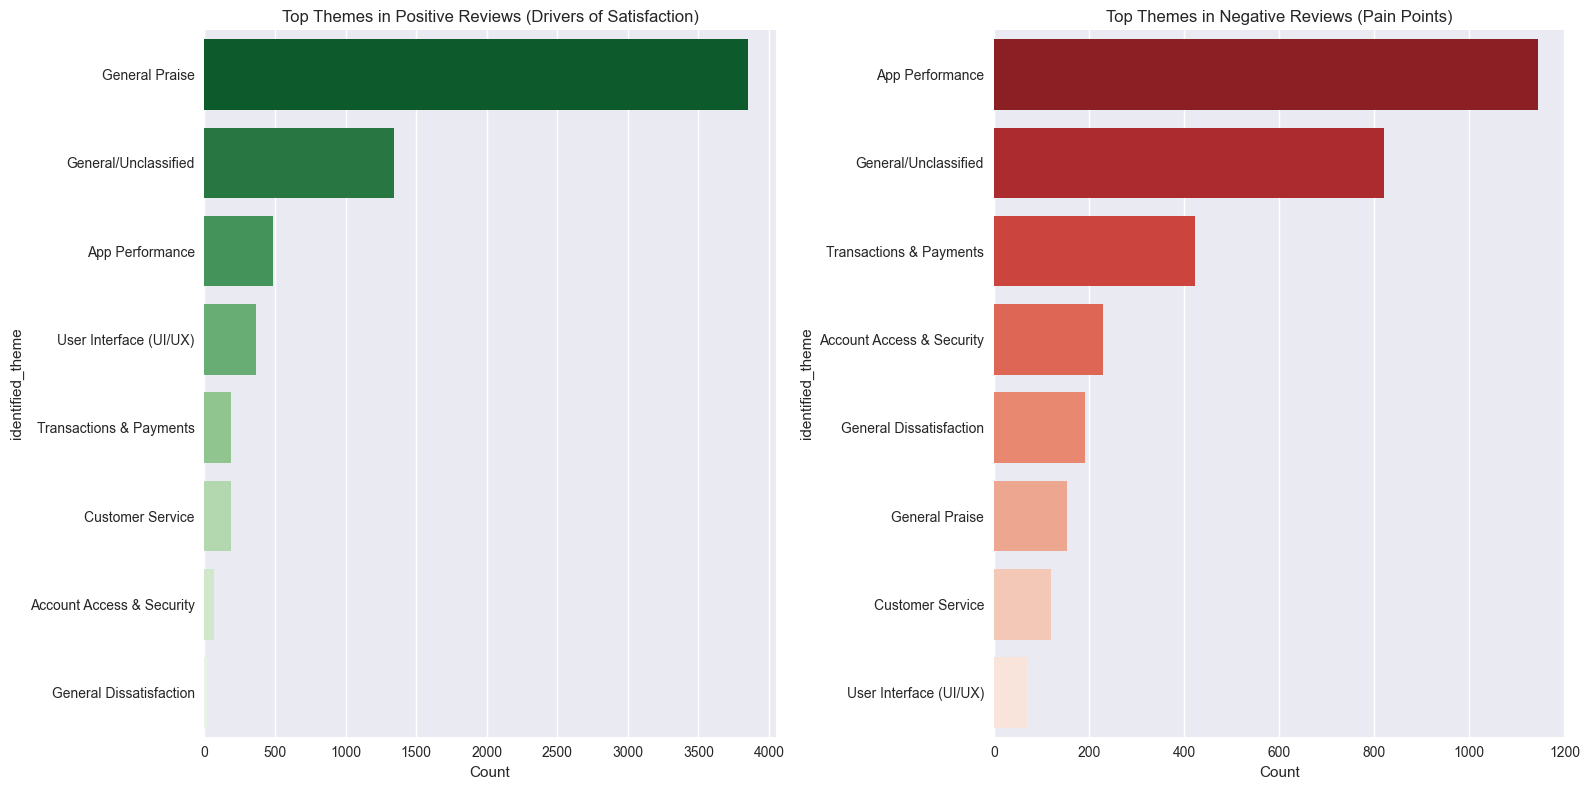


--- Drivers & Pain Points per Bank ---


C:\Users\yeget\AppData\Local\Temp\ipykernel_12864\3312049302.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='identified_theme', data=pos_bank, ax=axes[0],
C:\Users\yeget\AppData\Local\Temp\ipykernel_12864\3312049302.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='identified_theme', data=neg_bank, ax=axes[1],


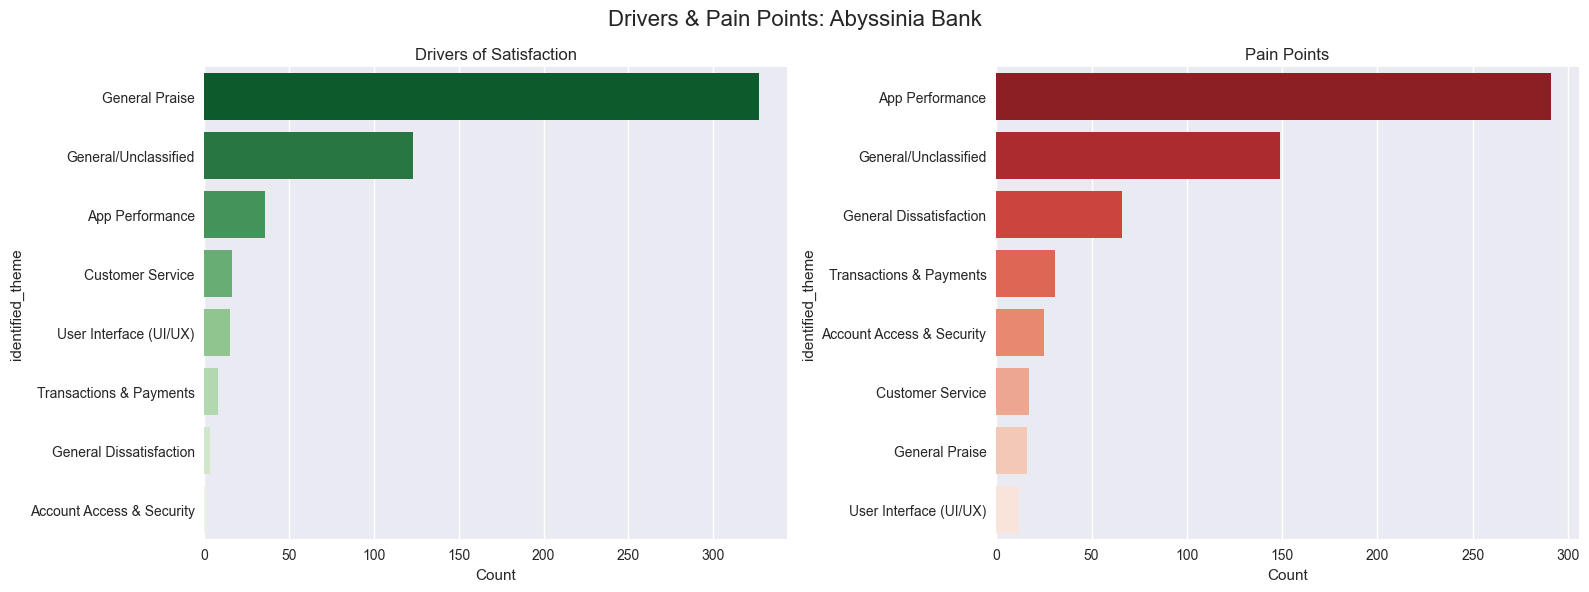

C:\Users\yeget\AppData\Local\Temp\ipykernel_12864\3312049302.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='identified_theme', data=pos_bank, ax=axes[0],
C:\Users\yeget\AppData\Local\Temp\ipykernel_12864\3312049302.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='identified_theme', data=neg_bank, ax=axes[1],
C:\Users\yeget\AppData\Local\Temp\ipykernel_12864\3312049302.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='identified_theme', data=neg_bank, ax=axes[1],


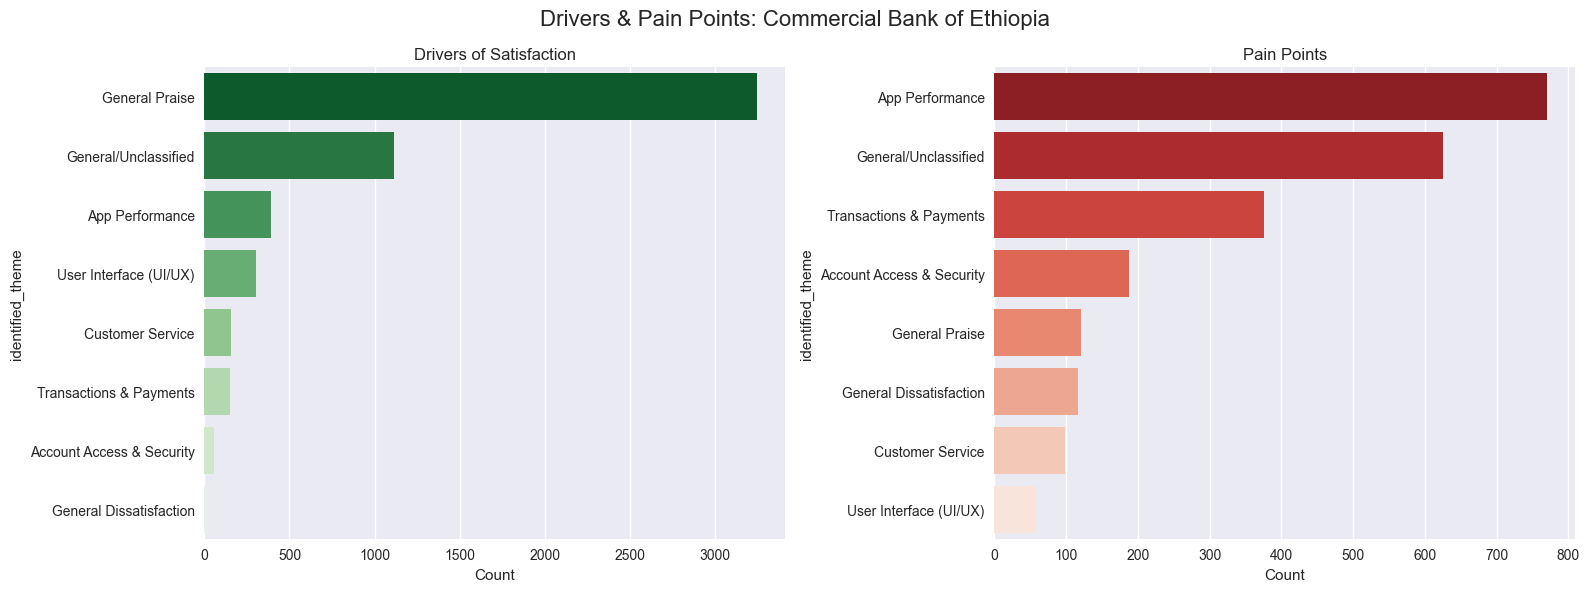

C:\Users\yeget\AppData\Local\Temp\ipykernel_12864\3312049302.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='identified_theme', data=pos_bank, ax=axes[0],
C:\Users\yeget\AppData\Local\Temp\ipykernel_12864\3312049302.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='identified_theme', data=neg_bank, ax=axes[1],


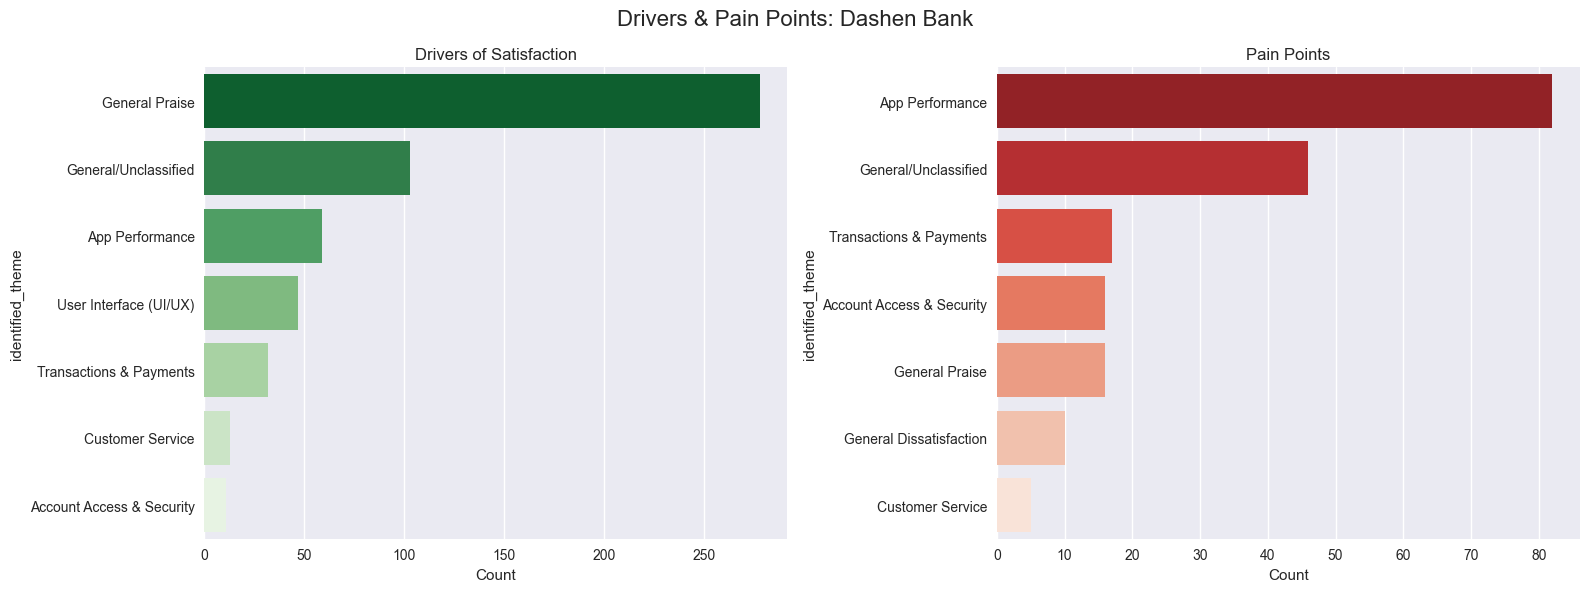

In [34]:
# Merge Themes with BERT Sentiment
# We merge on review_id to ensure data alignment
df_merged = pd.merge(df_themes, df_bert[['review_id', 'sentiment_label']], on='review_id', how='inner', suffixes=('_vader', '_bert'))

# Rename the BERT sentiment column for clarity
df_merged.rename(columns={'sentiment_label_bert': 'sentiment'}, inplace=True)

# Filter for Positive and Negative reviews
positive_reviews = df_merged[df_merged['sentiment'] == 'positive']
negative_reviews = df_merged[df_merged['sentiment'] == 'negative']

# --- General Analysis ---
print("--- General Drivers & Pain Points (All Banks) ---")
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Top Themes in Positive Reviews
sns.countplot(y='identified_theme', data=positive_reviews, ax=axes[0], order=positive_reviews['identified_theme'].value_counts().index, palette='Greens_r')
axes[0].set_title('Top Themes in Positive Reviews (Drivers of Satisfaction)')
axes[0].set_xlabel('Count')

# Top Themes in Negative Reviews
sns.countplot(y='identified_theme', data=negative_reviews, ax=axes[1], order=negative_reviews['identified_theme'].value_counts().index, palette='Reds_r')
axes[1].set_title('Top Themes in Negative Reviews (Pain Points)')
axes[1].set_xlabel('Count')

plt.tight_layout()
plt.show()

# --- Per Bank Analysis ---
print("\n--- Drivers & Pain Points per Bank ---")
banks = df_merged['bank_name'].unique()

for bank in banks:
    bank_data = df_merged[df_merged['bank_name'] == bank]
    pos_bank = bank_data[bank_data['sentiment'] == 'positive']
    neg_bank = bank_data[bank_data['sentiment'] == 'negative']
    
    if pos_bank.empty and neg_bank.empty:
        continue
        
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle(f'Drivers & Pain Points: {bank}', fontsize=16)
    
    # Positive
    if not pos_bank.empty:
        sns.countplot(y='identified_theme', data=pos_bank, ax=axes[0], 
                      order=pos_bank['identified_theme'].value_counts().index, palette='Greens_r')
        axes[0].set_title('Drivers of Satisfaction')
        axes[0].set_xlabel('Count')
    else:
        axes[0].axis('off')
    
    # Negative
    if not neg_bank.empty:
        sns.countplot(y='identified_theme', data=neg_bank, ax=axes[1], 
                      order=neg_bank['identified_theme'].value_counts().index, palette='Reds_r')
        axes[1].set_title('Pain Points')
        axes[1].set_xlabel('Count')
    else:
        axes[1].axis('off')
        
    plt.tight_layout()
    plt.show()

C:\Users\yeget\AppData\Local\Temp\ipykernel_12864\3006389436.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='topic_label', data=positive_reviews_lda, ax=axes[0], order=positive_reviews_lda['topic_label'].value_counts().index, palette='Greens_r')
C:\Users\yeget\AppData\Local\Temp\ipykernel_12864\3006389436.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='topic_label', data=negative_reviews_lda, ax=axes[1], order=negative_reviews_lda['topic_label'].value_counts().index, palette='Reds_r')


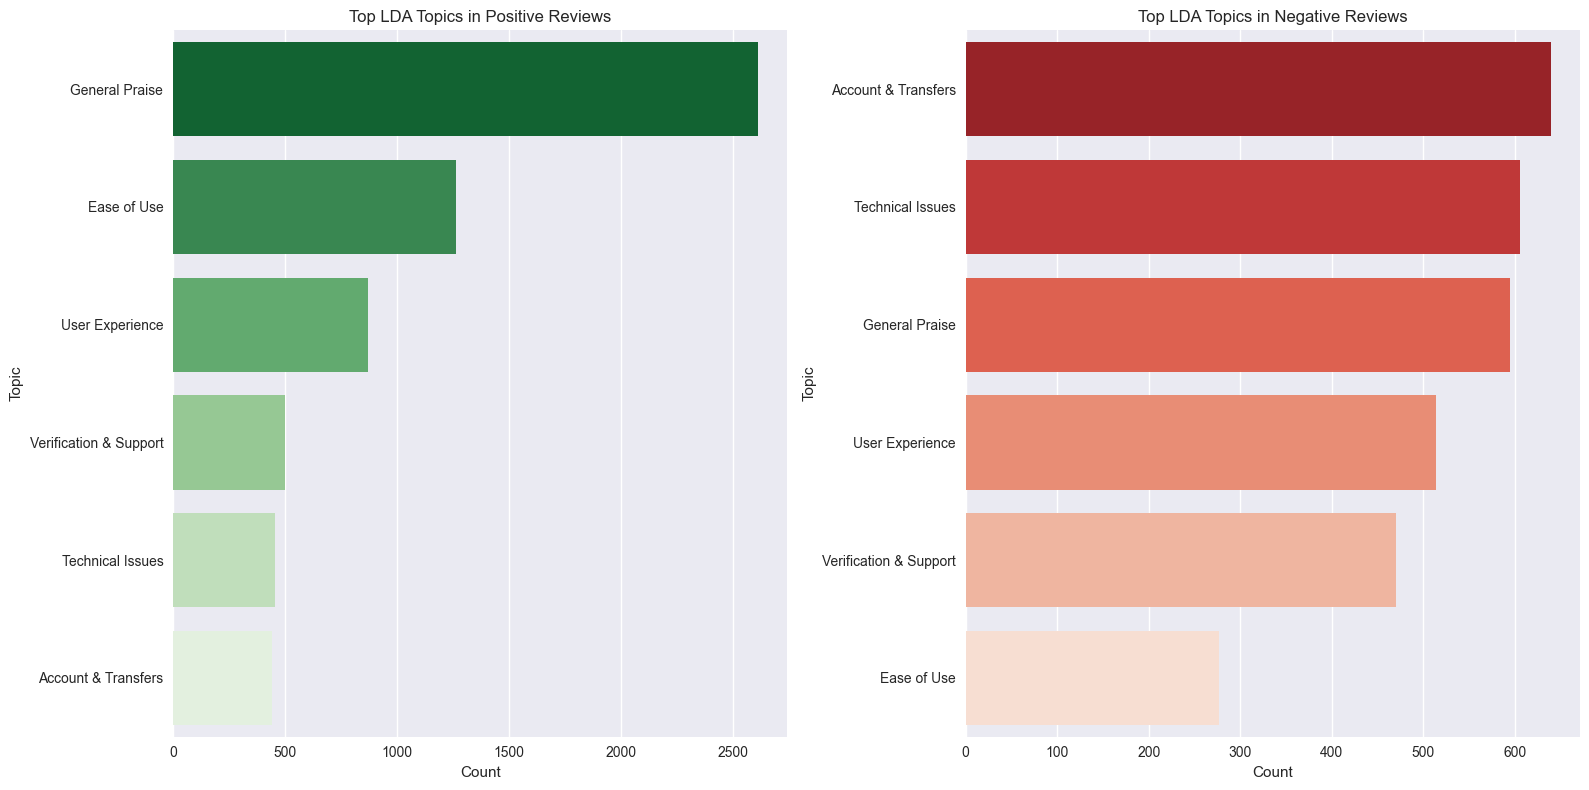

In [35]:
# Merge LDA Themes with BERT Sentiment
df_merged_lda = pd.merge(df_themes_lda, df_bert[['review_id', 'sentiment_label']], on='review_id', how='inner', suffixes=('_lda', '_bert'))
df_merged_lda.rename(columns={'sentiment_label_bert': 'sentiment'}, inplace=True)

# Define Topic Labels (Based on LDA Top Words)
# Topic 0: wow, application, ever, seen, connection -> User Experience
# Topic 1: service, transfer, money, account, fix -> Account & Transfers
# Topic 2: good, best, like, fast, excellent -> General Praise
# Topic 3: nice, use, easy, great, payment -> Ease of Use
# Topic 4: transaction, make, work, doesnt, code -> Technical Issues
# Topic 5: one, dashen, amazing, verification -> Verification & Support

topic_mapping = {
    'Topic 0': 'User Experience',
    'Topic 1': 'Account & Transfers',
    'Topic 2': 'General Praise',
    'Topic 3': 'Ease of Use',
    'Topic 4': 'Technical Issues',
    'Topic 5': 'Verification & Support'
}

# Apply mapping
df_merged_lda['topic_label'] = df_merged_lda['identified_topic'].map(topic_mapping)

# Filter for Positive and Negative reviews
positive_reviews_lda = df_merged_lda[df_merged_lda['sentiment'] == 'positive']
negative_reviews_lda = df_merged_lda[df_merged_lda['sentiment'] == 'negative']

# Plotting LDA Topics
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Top Topics in Positive Reviews
sns.countplot(y='topic_label', data=positive_reviews_lda, ax=axes[0], order=positive_reviews_lda['topic_label'].value_counts().index, palette='Greens_r')
axes[0].set_title('Top LDA Topics in Positive Reviews')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Topic')

# Top Topics in Negative Reviews
sns.countplot(y='topic_label', data=negative_reviews_lda, ax=axes[1], order=negative_reviews_lda['topic_label'].value_counts().index, palette='Reds_r')
axes[1].set_title('Top LDA Topics in Negative Reviews')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Topic')

plt.tight_layout()
plt.show()

## 2.1 LDA Topic Analysis

We also analyze the topics discovered by the unsupervised LDA model to see if they align with the rule-based themes.

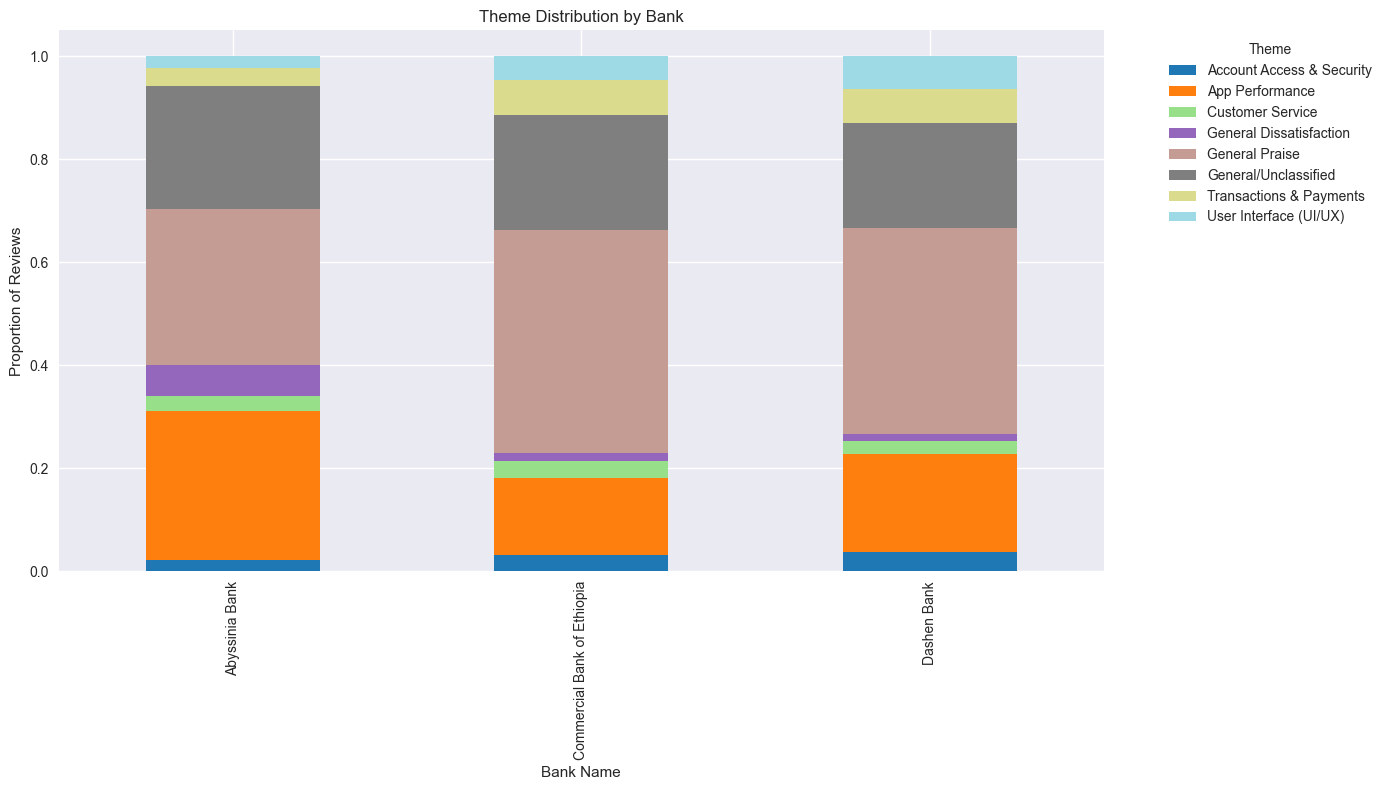

In [36]:
# Cross-tabulation of App Name and Identified Theme
# Ensure we use the merged dataframe which has the correct columns
theme_app_ct = pd.crosstab(df_merged['bank_name'], df_merged['identified_theme'])

# Normalize to get percentages
theme_app_pct = theme_app_ct.div(theme_app_ct.sum(1), axis=0)

# Plotting Stacked Bar Chart
theme_app_pct.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')
plt.title('Theme Distribution by Bank')
plt.xlabel('Bank Name')
plt.ylabel('Proportion of Reviews')
plt.legend(title='Theme', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

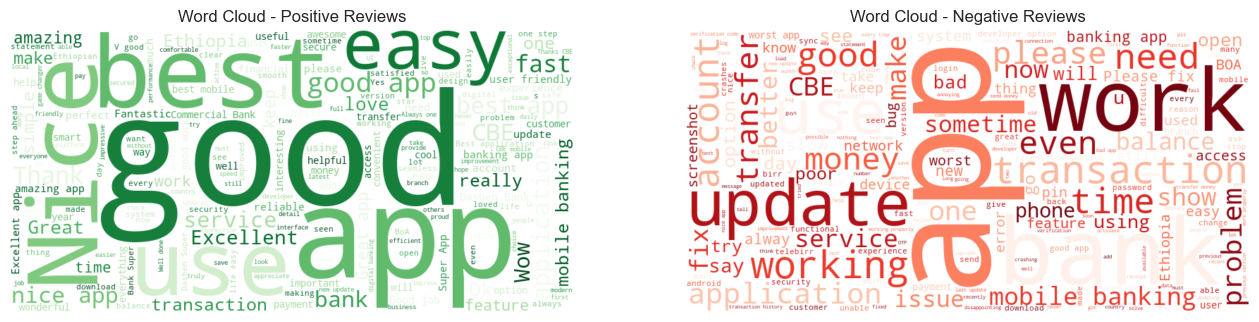

In [37]:
# Prepare text for Word Clouds
# We use the 'review_text' column from df_vader which we merged into df_merged (we need to add it first)
df_merged['review_text'] = df_vader['review_text']

positive_text = ' '.join(df_merged[df_merged['sentiment'] == 'positive']['review_text'].dropna().astype(str))
negative_text = ' '.join(df_merged[df_merged['sentiment'] == 'negative']['review_text'].dropna().astype(str))

# Generate Word Clouds
wc_pos = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(positive_text)
wc_neg = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_text)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

axes[0].imshow(wc_pos, interpolation='bilinear')
axes[0].set_title('Word Cloud - Positive Reviews')
axes[0].axis('off')

axes[1].imshow(wc_neg, interpolation='bilinear')
axes[1].set_title('Word Cloud - Negative Reviews')
axes[1].axis('off')

plt.show()

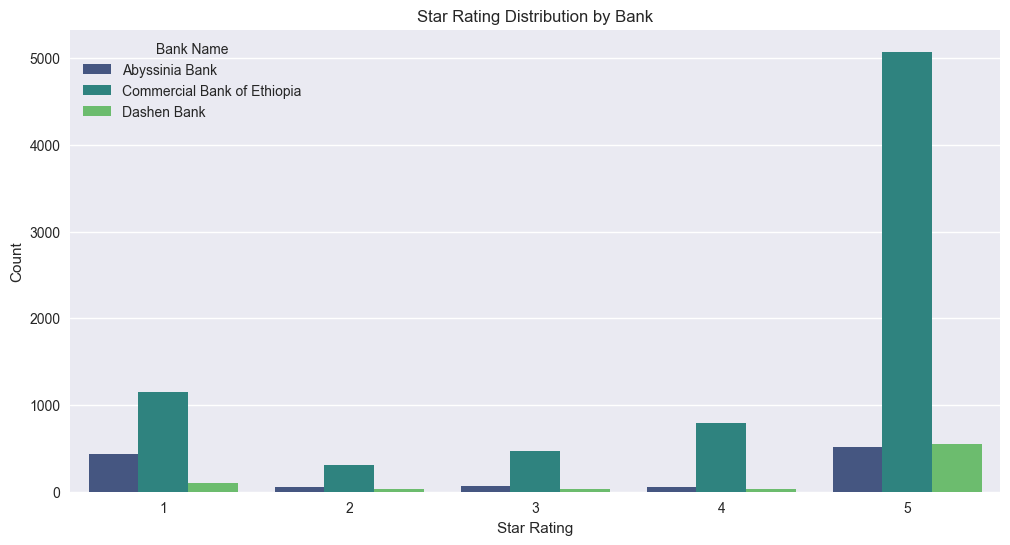

Star Rating Proportions:
rating
5    0.635234
1    0.174620
4    0.091605
3    0.058483
2    0.040058
Name: proportion, dtype: float64


In [38]:
# Star Rating Distribution by App
plt.figure(figsize=(12, 6))
sns.countplot(x='rating', hue='bank_name', data=df_vader, palette='viridis')
plt.title('Star Rating Distribution by Bank')
plt.xlabel('Star Rating')
plt.ylabel('Count')
plt.legend(title='Bank Name')
plt.show()

# Check for class imbalance
rating_counts = df_vader['rating'].value_counts(normalize=True)
print("Star Rating Proportions:")
print(rating_counts)

## 5. Ethics & Bias Check

We examine the distribution of star ratings to identify potential biases in the dataset, such as extreme polarization or lack of representation for certain user segments.

## 4. Word Clouds

We visualize the most frequent words in positive and negative reviews to get a qualitative sense of the user feedback.

## 3. Theme Distribution by Bank

We analyze how the prevalence of different themes varies across the analyzed fintech apps.

## 2. Drivers of Satisfaction & Dissatisfaction

We merge the identified themes with the BERT sentiment labels to understand which themes are driving positive and negative feedback.

## 1. Comparative Analysis: VADER vs. BERT

We compare the sentiment distributions of the rule-based VADER model and the pre-trained BERT model. BERT is generally expected to be more accurate for complex language nuances.